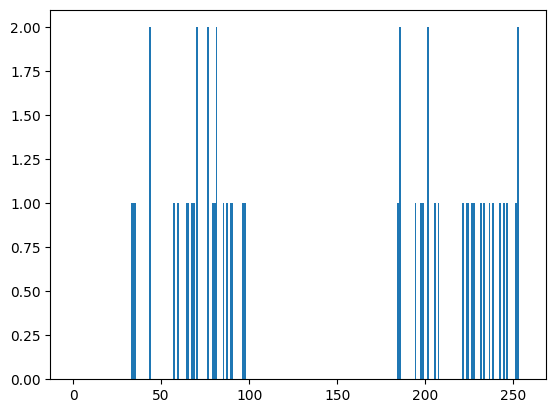

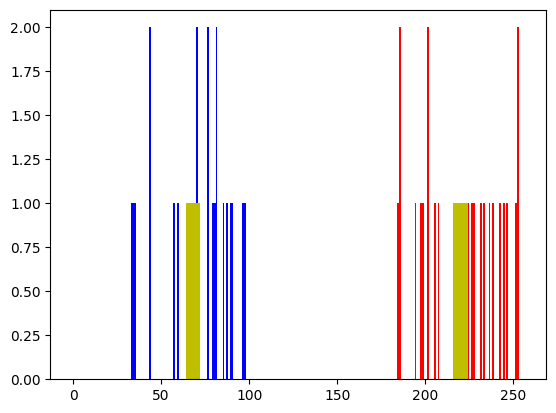

In [11]:
# 单特征数据的聚类
import numpy as np
import cv2
from matplotlib import pyplot as plt

x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)

z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z,256,[0,256]),plt.show()

# 定义终止条件 = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# 设置标志
flags = cv2.KMEANS_RANDOM_CENTERS

# 应用 KMeans
compactness, labels, centers = cv2.kmeans(z, 2, None, criteria, 10, flags)

A = z[labels == 0]
B = z[labels == 1]

# 红色 A，蓝色 B， 黄色中心
plt.hist(A, 256, [0, 256], color='r')
plt.hist(B, 256, [0, 256], color='b')
plt.hist(centers, 32, [0, 256], color='y')
plt.show()



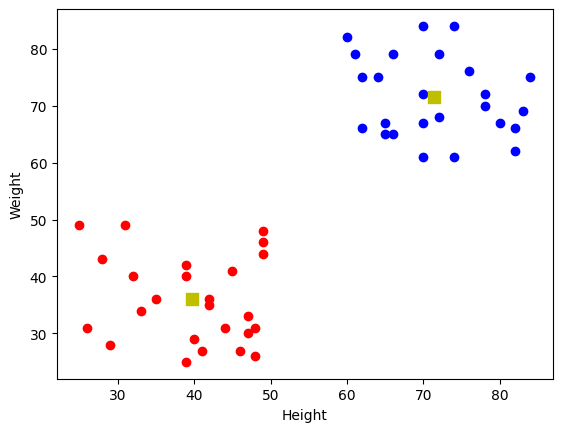

In [21]:
# 多特征数据的聚类
import numpy as np
import cv2
from matplotlib import pyplot as plt

Data1 = np.random.randint(25, 50, (25, 2))
Data2 = np.random.randint(60, 85, (25, 2))
Z = np.vstack((Data1, Data2))

# 浮点数
Z = np.float32(Z)

# 定义终止条件和应用KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(
    Z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 
A = Z[label.ravel() == 0]
B = Z[label.ravel() == 1]

# Plot the data
plt.scatter(A[:, 0], A[:, 1], c='b')
plt.scatter(B[:, 0], B[:, 1], c='r')
plt.scatter(center[:, 0], center[:, 1], s=80, c='y', marker='s')
plt.xlabel('Height'), plt.ylabel('Weight')
plt.show()


In [27]:
# 颜色量化
import numpy as np
import cv2
img = cv2.imread('assets/home.jpg')
Z = img.reshape((-1, 3))

# 
Z = np.float32(Z)
# 定义终止条件和应用 KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 32
ret, label, center = cv2.kmeans(
    Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 
center = np.uint8(center)
res = center[label.flatten()]

res2 = res.reshape((img.shape))
cv2.imshow('res2', res2)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[165.41064    98.69895    33.402386 ]
 [170.18724    97.9058     17.296526 ]
 [140.02211   170.0222    177.21584  ]
 [205.61882   172.1971    138.1751   ]
 [171.25067   198.88708   205.48737  ]
 [158.44608    92.08767    23.209347 ]
 [ 31.893974   53.703068   59.22333  ]
 [ 68.53382    39.346863   16.424355 ]
 [186.67705   118.32854    45.81461  ]
 [173.36783   108.26745    42.628185 ]
 [178.4515    108.047      31.903856 ]
 [174.04843   120.88579    60.331825 ]
 [157.06177   111.308876   66.0888   ]
 [116.044174   67.81124    22.640562 ]
 [153.95686    98.72237    46.512127 ]
 [186.75021   131.92256    77.986946 ]
 [136.78108    87.71614    41.513916 ]
 [ 64.38726   112.90927   128.68134  ]
 [160.9505     89.076515    6.9028115]
 [193.07707   147.83131   104.7962   ]
 [127.280464  188.2961    204.84113  ]
 [136.00693   101.768166   67.197235 ]
 [182.2671    124.62258    62.982327 ]
 [ 97.52461    84.17846    65.52154  ]
 [  9.736107   21.15631    25.476595 ]
 [ 48.534115   78.61298  